## Winter of Code 7.0: Natural Language Processing (NLP)

### Fake Review Detection 

### import necessary  libraries

In [249]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [250]:
df=pd.read_csv("fakeReviewData.csv")

In [251]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [252]:
df.shape

(40432, 4)

In [253]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [255]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [256]:
df['label'].unique()

array(['CG', 'OR'], dtype=object)

In [257]:
df['rating'].unique()

array([5, 1, 3, 2, 4])

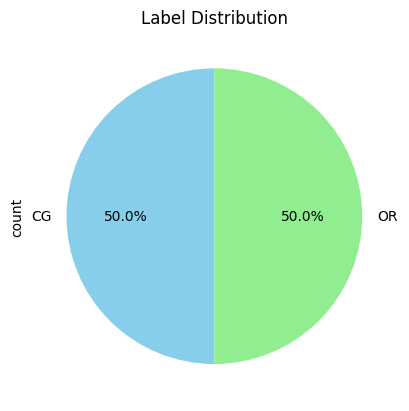

In [258]:
colors = ['skyblue', 'lightgreen']  
df['label'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors[:df['label'].nunique()]
)
plt.title('Label Distribution')
plt.show()

## Most Frequent Words in Fake Reviews

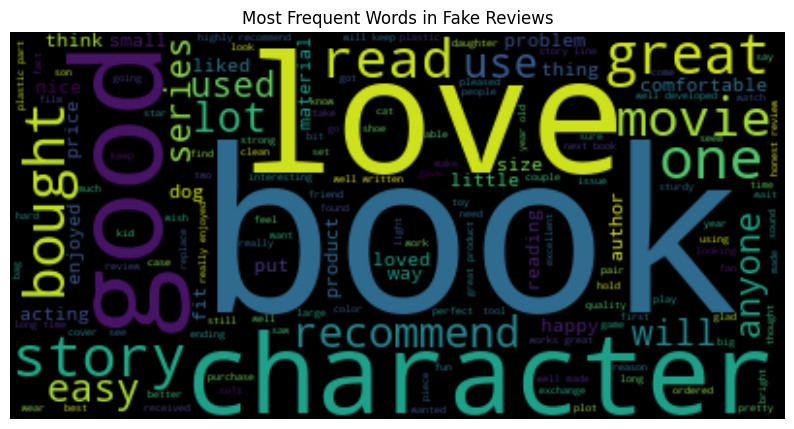

In [259]:
from wordcloud import WordCloud
fake_reviews = " ".join(df[df['label'] == 'CG']['text_'])
wordcloud = WordCloud().generate(fake_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Fake Reviews')
plt.show()

### The visualization of most frequent words in fake reviews is helpful because it can provide valuable insights into the nature of fake reviews

#  Rating distribution 

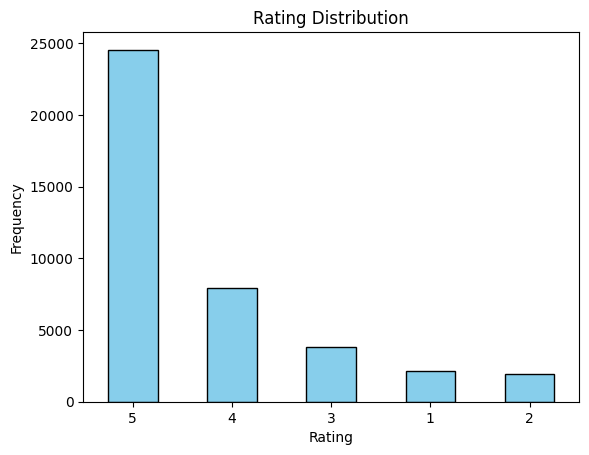

In [260]:
df['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(rotation=0)
plt.show()

# Rating Distribution for just Fake Reviews

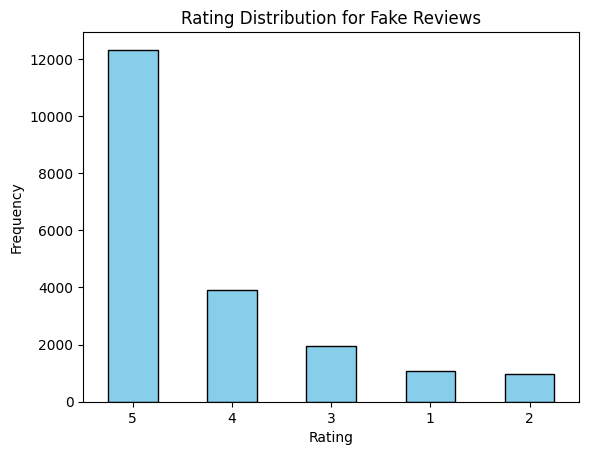

In [261]:
df[df['label'] == 'CG']['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Fake Reviews')
plt.xticks(rotation=0)
plt.show()

## why fake Reviewer rating distribution is important 
- Identifying Rating Patterns in Fake Reviews
- Understanding Reviewer Behavior

In [262]:
# Add a new column to store the length of each review in characters
df['review_length'] = df['text_'].apply(len)

In [263]:
df.head()

,category,rating,label,text_,review_length
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,85


#  Preprocessing

##  1.Data Cleaning

In [264]:
# Check missing values
df.isnull().sum()

category         0
rating           0
label            0
text_            0
review_length    0
dtype: int64

### No any missing values

###  Removing duplicates and irrelevant data

In [265]:
# Drop the 'category' column from the DataFrame
df = df.drop(columns=['category'])

In [266]:
# Checking for duplicates
dub=df.duplicated().sum() 
print(dub)

12


In [267]:
# Removing duplicate rows
df= df.drop_duplicates()

In [268]:
# Remove the data where the text(Review) has fewer than 3 words
df = df[df['text_'].apply(lambda x: len(x.split()) >= 3)]

In [269]:
df.shape

(40417, 4)

## 2.Text Normalization

In [270]:
# Converting all text to lowercase to maintain uniformity.
df['text_'] = df['text_'].str.lower()

In [271]:
# Removing punctuation, special characters
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['text_'] = df['text_'].apply(clean_text)

##  Tokenization and Stopword Removal

In [274]:
df.rename(columns={'text_': 'review'}, inplace=True)

In [276]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_and_remove_stopwords(text):
    # Tokenizing the text
    words = word_tokenize(text.lower())  
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]  
    
    return words

# Apply the function
df['tokenized_review'] = df['review'].apply(tokenize_and_remove_stopwords)

# Show the first few rows of the dataframe with the tokenized review column
df[['review', 'tokenized_review']].head()


[nltk_data] Downloading package punkt to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Milan Nagvadiya/nltk_data'
    - 'c:\\Python312\\nltk_data'
    - 'c:\\Python312\\share\\nltk_data'
    - 'c:\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\Milan Nagvadiya\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words_in_list(tokenized_text):
    return [lemmatizer.lemmatize(word) for word in tokenized_text]
df['tokenized_lammatized_review']=df['tokenized_review'].apply(lemmatize_words_in_list)
df.drop(columns=['tokenized_review','review'],inplace=True)

# Word2Vec Model and Sentence Vectorization

In [ ]:
tl_reviews = df['tokenized_lammatized_review'].tolist()
word2vec_model = Word2Vec(sentences=tl_reviews, vector_size=300, window=5, min_count=1, workers=4)


def get_sentence_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    return np.mean(word_vectors, axis=0)

sentence_vectors = np.array([get_sentence_vector(review, word2vec_model) for review in tl_reviews])

vector_columns = [f'vector_{i}' for i in range(300)]
vector_df = pd.DataFrame(sentence_vectors, columns=vector_columns)

df = pd.concat([df.reset_index(drop=True), vector_df], axis=1)
df

## Lable encoding of lable coloumn

In [ ]:
df['label_encoded'] = df['label'].map({'CG': 1, 'OR': 0})